### Data Analytics - Group Project
# Predicting House Prices Using Advanced Regression Techniques

## Contents
* [Introduction and Motivation](#Introduction-and-Motivation)
* [Related Work](#Related-Work)
* [Initial Questions](#Initial-Questions)
* [Data Acquisition and Exploration](#Data-Acquisition-and-Exploration)
* [Data Preprocessing](#Data-Preprocessing) 
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Data Modelling](#Data-Modelling)
* [Model Evaluation](#Model-Evaluation)
* [Conclusion](#Conclusion)
* [Future Work](#Future-Work)
* [References](#References)

## Introduction and Motivation
Property or real estate has been a lucrative investment option for many people over the years as it involves a long-term financial commitment or considerable capital investment upfront. Therefore, it is vital to make "informed decisions", in other words, the right decision to constantly mantain a considerably high return on investment (ROI); or else the investment will not generate the expected returns. In the worst case scenario, it could even lead to investors losing their entire amount of money or asset. Deciding the value of a property (i.e. house) involves both science and art skills rather than pure intuition. There are multiple aspects to look into such as its built area, number of rooms and bathrooms, construction year, and the list goes on as these aspects are objective and measurable. On the other hand, certain aspects such as architectural design, lucky numbers or 'feng shui' are more subjective and varies significantly based on personal preferences which does not make it as the ideal feature to determine the price of a property.

Due to the everchanging property values or prices on a daily basis, one of the most important question that stakeholders (i.e. buyers, sellers, builders, investors) ask would be, "Is there are a way to predict the house prices based on certain identified features or parameters?". The reason is that, if the prediction could be executed well, it will be beneficial for house buyers as well as house sellers or builders. For instance, the house builders will be able to identify the most impactful aspects when building a house, in turn maximising the value of the house while keeping it at a minimum expenditure. It is a win-win situation for the sellers and the buyers respectively. One of the example from the many questions where house builders could potentially ask in deciding on cost effectiveness would be, "Is it cost effective to build a swimming pool or add more bathrooms instead?". An accurate prediction of model will help potential buyers to make the best decision in buying the property, rather than lamenting about the bad decisions made at a later period of time. Hence, the aim of this project is to predict the house price accurately based on the historical data by applying a regression algorithm along with some pre-processing techniques.

**[Back to Content](#Contents)**

## Related Work

Based on the introduction and motivation, real estate pricing remains an uncertainty to many people. Over the years, this phenomena has lead researches to perform predictions using several pre-processing techniques and algorithms to build the best models and ensure a more accurate prediction, in other words, a lower Root Mean Square Error (RMSE) from the actual price of houses. 

In 2012, Yusof and Ismail (2012) conducted a research which focuses on the explanation of some of the price variation on the chosen houses in Malaysia via Hedonic Regression Analysis; an extension from Multiple Regression Analysis (MRA). The end goal was to facilitate a smooth decision making in property investments via Mathematical tools. The model to determine house prices were constructed for two different years, 2000 and 2007. From the analysis, the R-squared value for both years were 77.2% and 83.6% respectively which makes the underlying house price variations to be reliable due to high explanatory power. Furthermore, some of the most influential factors to determine house price were location, building area, land area, distance from city centre, building age, and quality of neighbourhood. However, the downside of this research was that the usage of models were limited to only MRA and the researchers should consider more models to be able to determine the best model for determining house price variation.

Besides that, Varma, Sarma, Doshi, and Nair (2018) performed several regression techniques such as Linear Regression, Random Forest, and XGBoost in which the performance and results of the three models were based on weighted mean rather than comparison between the three to minimize errors and maximise accuracy. Also, the authors decided to apply neural network on the three algorithm which yielded a more accurate prediction on the price of houses. However, the drawback of this research was that no evaluation metrics such as accuracy score or RMSE were obtained as evidence on which models performed better. Similarly, in 2018, another researcher predicted the price of houses in the US by utilizing algorithms consisting of simple linear regression, multi linear regression, and neural network. The dataset was split into training and test dataset in a ratio of 75:25. In conclusion, neural network proved to be the best model with the lowest RMSE score of 2.1905 as compared to the other two models which yielded RMSE scores of 8.0337 and 5.4731 (Vineeth, Ayyappa, and Bharathi, 2018).

Recently, in 2020, a few researchers conducted similar researchers using improved machine learning techniques. They also claimed that the pricing of houses were strongly correlated with factors such as location, area, and population. Some of the algorithms utilized were Random Forest, XGBoost, LightGBM, Hybrid (65% Lasso and 35% XGBoost), and Stacked Generalization (Truong, Nguyen, Dang, and Mei, 2020). Hence, based on the related works discussed, this research is conducted to improve on the existing techniques of data preprocessing and data modelling to obtain more accurate predictions on the prices of houses in Ames, Iowa, United States.

**[Back to Content](#Contents)**

## Initial Questions

Before kick starting our group project, we have outlined some interesting questions which clearly defined the problem. Our main objective is to make prediction on the housing price. Thus, to achieve our goal, outlined below are the questions to be answered with our analysis:-
- What is the most suitable model to predict the selling price of a house?
- What are the influential parameters to build the house price prediction model?
- Which features causes a house to be the most expensive in the market?
- What are the past trends of housing market price?

**[Back to Content](#Contents)**

## Data Acquisition and Exploration
The historical house pricing data was obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) and it was prepared by Dean De Cock in 2011. This data set contains details of 1460 residential homes sold during year 2006 till 2010 in Ames, Iowa, United States with price ranging between \\$34,900 and \\$755,000.

The `train` set, which was renamed to ***Ames House Prices*** consists of 1460 observations and 81 variables (38 numerical and 43 categorical variables). The target variable is `SalePrice` which displays the selling price of the house. Further details on the metadata of the variables can be found in [Appendix A: Metadata](#Appendix-A:-Metadata)

**[Back to Content](#Contents)**

#### Import modules and read data

In [1]:
# Import Dependencies
%matplotlib inline

# Begin Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Read data
ames = pd.read_csv('Ames House Prices.csv')

### Overview of data

Let's take a quick glance at the first 5 rows of the `ames` dataframe. We observed that there were 1460 observations and 81 columns. For the columns, 79 different attributes were associated with the `Id` column which identified each housing purchase information and the `SalePrice` column which was labelled as our target variable. Also, there were some columns filled with `NAN` (Not a Number) or also known as null values which would be investigated further during the pre-processing stage. Below are the listed variables splitted into numerical and categorical variables.

#### Numerical variables: 
'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'

#### Categorical variables: 
'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature','SaleType', 'SaleCondition'


In [2]:
# Fist 5 observations of ames data frame
ames.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# Dimension of ames data frame
ames.shape

(1460, 81)

The data type for each columns are as shown below. There were some columns with less than 1460 of observations in which they consist of missing values and it will be curbed in the next segment of this project.

In [4]:
# summary of ames dataframe
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**[Back to Title](#Data-Acquisition-and-Exploration)**

## Data Preprocessing

* [Encoding categorical variables](#Encoding-categorical-variables)
* [Curbing missing data](#Curbing-missing-data)
* [Transformation of attributes](#Transformation-of-attributes)
* [Aggregation of data](#Aggregation-of-data)
* [Creation of dummy variables](#Creation-of-dummy-variables)

**[Back to Content](#Contents)**

### Encoding categorical variables

Some categorical attributes such as `ExterCond`, `ExterQual`, `BsmtQual`, `BsmtCond`, `KitchenQual`, `FireplaceQu`, `PoolQC`, `HeatingQC`, `GarageQual` and `GarageCond` are ordinal variables with specific ordering which can be converted into numerical ratings to each important features. For example, these attributes are recoded as shown in the table below:-

| Category | Rating | 
| :-: | :-: |
|  Excellent | 5 |
| Good | 4 |
| Average/Typical | 3 |
| Fair | 2 |
| Poor | 1 |
| None | 0 |

Other attributes with obvious ordering pattern such as `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2` and `Fence` are encoded to transform non-numerical labels into numerical labels. `CentralAir` is a binary variable with a 'Yes' and 'No' response. Thus, it is converted in a way whereby responses with 'Yes' returns a value of 1 while responses with 'No' returns a value of 0.

In [5]:
# Encode rating level attributes
numeric_type= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

quality = ["Ex","Gd","TA","Fa","Po","NA"]
quality_rate = [5,4,3,2,1,0]

bsmtExp = ["Gd","Av","Mn","No","NA"]
bsmtExp_rate = [3,2,1,0,0]

bsmtFin = ["GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA"]
bsmtFin_rate = [5,4,3,2,1,0,0]

yn=["Y","N"]
yn_code = [1,0]

fence = ["GdPrv","MnPrv","GdWo","MnWw","NA"]
fence_rate = [4,3,2,1,0]


# Create recode_data function
def recode_data(data,column,old,new):
    if data[column].dtype in numeric_type:
        pass
    else:
        data[column] = data[column].replace(old, new)

        
# Encode ames data
recode_data(ames,"ExterCond",quality,quality_rate)
recode_data(ames,"ExterQual",quality,quality_rate)
recode_data(ames,"BsmtQual",quality,quality_rate)
recode_data(ames,"BsmtCond",quality,quality_rate)
recode_data(ames,"KitchenQual",quality,quality_rate)
recode_data(ames,"FireplaceQu",quality,quality_rate)
recode_data(ames,"PoolQC",quality,quality_rate)
recode_data(ames,"HeatingQC",quality,quality_rate)
recode_data(ames,"GarageQual",quality,quality_rate)
recode_data(ames,"GarageCond",quality,quality_rate)

recode_data(ames,"BsmtExposure",bsmtExp,bsmtExp_rate)
recode_data(ames,"BsmtFinType1",bsmtFin,bsmtFin_rate)
recode_data(ames,"BsmtFinType2",bsmtFin,bsmtFin_rate)
recode_data(ames,"CentralAir",yn,yn_code)
recode_data(ames,"Fence",fence,fence_rate)

`MSSubClass` column displays the type of dwelling involved for houses in a specific numeric code and read as a numeric data type. To better illustrate the current scenario by treating this column as a qualitative variable, its data type is converted into `category`.

| Code | Type of dwelling |
| :-: | :- |
| 20 | 1-STORY 1946 & NEWER ALL STYLES |
| 30 | 1-STORY 1945 & OLDER |
| 40 | 1-STORY W/FINISHED ATTIC ALL AGES |
| 45 | 1-1/2 STORY - UNFINISHED ALL AGES |
| 50 | 1-1/2 STORY FINISHED ALL AGES |
| 60 | 2-STORY 1946 & NEWER |
| 70 | 2-STORY 1945 & OLDER |
| 75 | 2-1/2 STORY ALL AGES |
| 80 | SPLIT OR MULTI-LEVEL |
| 85 | SPLIT FOYER |
| 90 | DUPLEX - ALL STYLES AND AGES |
| 120 | 1-STORY PUD (Planned Unit Development) - 1946 & NEWER |
| 150 | 1-1/2 STORY PUD - ALL AGES |
| 160 | 2-STORY PUD - 1946 & NEWER |
| 180 | PUD - MULTILEVEL - INCL SPLIT LEV/FOYER |
| 190 | 2 FAMILY CONVERSION - ALL STYLES AND AGES |

In [6]:
# Convert MSSubClass column into category
ames["MSSubClass"] = ames["MSSubClass"].astype('category')

**[Back to Title](#Data-Preprocessing)**

### Curbing missing data

Missing data incurs problem in our analysis which should be curbed before proceeding further on our analysis. There are several ways to impute missing data. In order to determine on which imputation method is better, the proportion of missing data for each column is calculated. 

In [7]:
# Calculate the proportion of missing data

def checkMissing(data,perc=0):
    """ 
    Takes in a dataframe and returns
    the percentage of missing value.
    """
    missing = [(i, ames[i].isna().mean()*100) for i in ames]
    missing = pd.DataFrame(missing, columns=["column_name", "percentage"])
    missing = missing[missing.percentage > perc]
    print(missing.sort_values("percentage", ascending=False).reset_index(drop=True))

print("Proportion of missing data in columns")
checkMissing(ames)
print()

Proportion of missing data in columns
     column_name  percentage
0         PoolQC   99.520548
1    MiscFeature   96.301370
2          Alley   93.767123
3          Fence   80.753425
4    FireplaceQu   47.260274
5    LotFrontage   17.739726
6     GarageType    5.547945
7    GarageYrBlt    5.547945
8   GarageFinish    5.547945
9     GarageQual    5.547945
10    GarageCond    5.547945
11  BsmtExposure    2.602740
12  BsmtFinType2    2.602740
13  BsmtFinType1    2.534247
14      BsmtCond    2.534247
15      BsmtQual    2.534247
16    MasVnrArea    0.547945
17    MasVnrType    0.547945
18    Electrical    0.068493



The heatmap is generated below to visualize the location of missing data for each column. The white spaces indicate the missing input at the position of row. There are a few columns which has more than 50% of missing values as illustrated in the white lines on the heatmap.

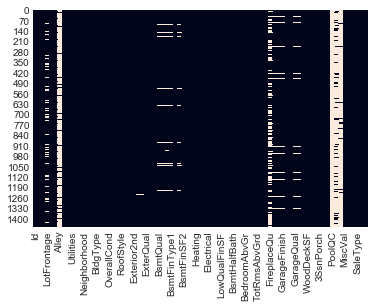

In [8]:
#heatmap for all missing value based on location of data for each column
sns.heatmap(ames.isnull(), cbar=False)

We decided to drop some columns, `Alley`, `PoolQC`, `Fence` and `MiscFeature` from the dataframe as these columns had more than 50% of missing values which does not provide any useful information to our analysis. 

In [9]:
#Drop the missing value for columns ['Alley', 'PoolQC', 'Fence','MiscFeature']

ames.drop(['Alley', 'PoolQC', 'Fence','MiscFeature'], axis = 1, inplace = True)

#### Imputation method for missing values
After removing some of the columns, there are still remaining missing values which are not curbed yet. Therefore, we decided to utilize the cold-deck imputation method to impute the missing values.

In [10]:
# Display columns with missing value
print("Columns with missing value in train data")
ames.columns[ames.isnull().any()]

Columns with missing value in train data


Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [11]:
# frequency of specific values occuring in a column
ames['LotFrontage'].value_counts() # take mean

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [12]:
# frequency of specific values occuring in a column
ames['MasVnrType'].value_counts() # take mode

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

Missing values in numerical columns are imputed with its column average value whereas the categorical columns are imputed with the category that occurs most frequently in a particular column.

In [13]:
#Fill the missing value with mean 
ames['LotFrontage']=ames['LotFrontage'].fillna(ames['LotFrontage'].mean())
ames['MasVnrArea']=ames['MasVnrArea'].fillna(ames['MasVnrArea'].mean())
ames['GarageYrBlt']=ames['GarageYrBlt'].fillna(ames['GarageYrBlt'].mean())

In [14]:
#Fill the missing value with mode 
ames['MasVnrType']=ames['MasVnrType'].fillna(ames['MasVnrType'].mode()[0])
ames['BsmtQual']=ames['BsmtQual'].fillna(ames['BsmtQual'].mode()[0])
ames['BsmtCond']=ames['BsmtCond'].fillna(ames['BsmtCond'].mode()[0])
ames['BsmtExposure']=ames['BsmtExposure'].fillna(ames['BsmtExposure'].mode()[0])
ames['BsmtFinType1']=ames['BsmtFinType1'].fillna(ames['BsmtFinType1'].mode()[0])
ames['BsmtFinType2']=ames['BsmtFinType2'].fillna(ames['BsmtFinType2'].mode()[0])
ames['Electrical']=ames['Electrical'].fillna(ames['Electrical'].mode()[0])
ames['FireplaceQu']=ames['FireplaceQu'].fillna(ames['FireplaceQu'].mode()[0])
ames['GarageType']=ames['GarageType'].fillna(ames['GarageType'].mode()[0])
ames['GarageFinish']=ames['GarageFinish'].fillna(ames['GarageFinish'].mode()[0])
ames['GarageQual']=ames['GarageQual'].fillna(ames['GarageQual'].mode()[0])
ames['GarageCond']=ames['GarageCond'].fillna(ames['GarageCond'].mode()[0])

After performing several steps of checking and imputing the missing values, the data frame is clean and complete without any presence of missing data.

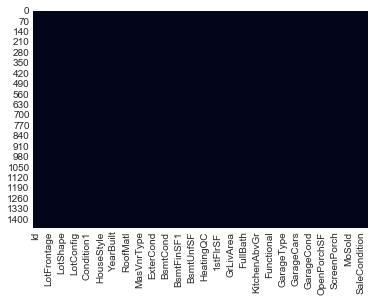

In [15]:
#heatmap after data cleaning
sns.heatmap(ames.isnull(), cbar=False)

**[Back to Title](#Data-Preprocessing)**

### Transformation of attributes

There are many attributes available to describe the house and its condition such as the year on when the house was sold, when it was built, when it was remodeled, and when the garage was built. However, as per observation, these variables did not contribute much information to the machine learning model. Hence, in this section, we created new attributes by transforming the existing columns to derive a more useful information for our analysis. 

We began by creating new columns. `HouseYrWhenSold` displays the number of years when the house was sold by taking `YrSold` minus `YearBuilt`. Also, the same approach is applied to calculate the number of years of garage when the house was sold. A new binary variable, `Remodeled Y/N` is created to check if the house was remodelled before. These new variables are more intuitive from their original columns which would be useful for modelling in the next segment of this project.

In [16]:
# Create new columns 
ames["HouseYrWhenSold"]=ames["YrSold"]-ames["YearBuilt"]
ames['Remodeled Y/N'] = np.where(ames['YearRemodAdd']==ames['YearBuilt'], 'N', 'Y')
ames['Remodeled Y/N'] = ames['Remodeled Y/N'].astype('category')
ames["GarageYrWhenSold"]=ames["YrSold"]-ames["GarageYrBlt"]

# Recode the binary variable
recode_data(ames,"Remodeled Y/N",yn,yn_code)

In our next step, before removing the orginal attributes, we performed visualizations on the trend of house selling price by year on when the house was built, when was it remodelled, and when was its garage built.

As per observation, the new houses were sold at a higher price especially for the houses that were built after the 20th century. Besides that, houses which were remodelled in the recent years were sold with a higher price. The smiliar trend is observed for houses with new garage. This concludes that the new houses and recently remodelled houses are more expensive in the market.

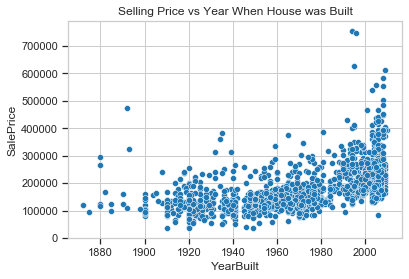

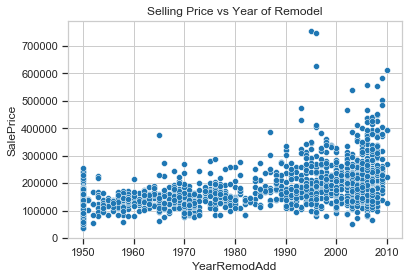

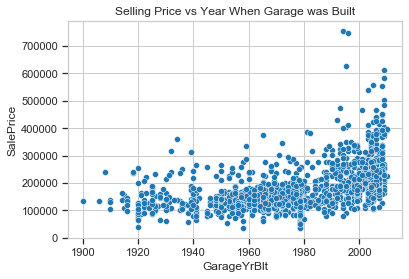

In [17]:
sns.set_context("notebook")

# Selling Price vs Year When House was Built
sns.scatterplot(x='YearBuilt',y="SalePrice",data=ames, palette='Blues')
plt.title("Selling Price vs Year When House was Built")
plt.show()

# Selling Price vs Year When House was Built
sns.scatterplot(x='YearRemodAdd',y="SalePrice",data=ames, palette='Blues')
plt.title("Selling Price vs Year of Remodel")
plt.show()

# Selling Price vs Year When House was Built
sns.scatterplot(x='GarageYrBlt',y="SalePrice",data=ames, palette='Blues')
plt.title("Selling Price vs Year When Garage was Built")
plt.show()


The selling price of houses were quite consistent from 2006 to 2010 though there were some outliers present based on the location of dots above the upper boundary of the boxplots. It is not surprising to see that the selling prices are higher than the normal range because houses are permanent assets that do not depreciate in a large extent even if it has been built for many years.

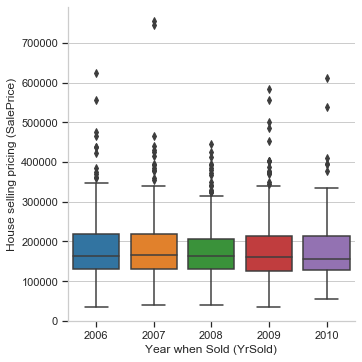

In [18]:
sns.set_context("notebook")
y=sns.catplot(x='YrSold', y="SalePrice", data=ames, kind="box")
y.set(ylabel="House selling pricing (SalePrice)")
y.set(xlabel="Year when Sold (YrSold)")
plt.show()

These following variables are then dropped: `YearRemodAdd`,`YearBuilt`,`YrSold`,`GarageYrBlt` for the simplification in the modelling process later on as we have derived the new columns to show the number of years for each attribute.

In [19]:
# Remove variables that show the years which are derived to show the number of years
to_remove_yr = ['YearRemodAdd','YearBuilt','YrSold','GarageYrBlt']
ames.drop(to_remove_yr, axis = 1, inplace = True)

**[Back to Title](#Data-Preprocessing)**

### Aggregation of data

There were some variables which describe similar features such as the square feets of different areas and the number of bathrooms in different floors. Hence, we aggregated the values of these attributes to display new variables which are the total square feet of the house, `totalSqFt` and the number of bathrooms available, `totalBath`. 

In [20]:
# TotalBsmtSF + GrLivArea + 1stFlrSF + 2ndFlrSF
ames['totalSqFt'] = ames['TotalBsmtSF'] + ames['GrLivArea'] + ames['1stFlrSF'] + ames['2ndFlrSF']

# FullBath + 0.5*HalfBath + BsmtFullBath + 0.5*BsmtHalfBath
ames['totalBath'] = ames['FullBath'] + 0.5*ames['HalfBath'] + ames['BsmtFullBath'] + 0.5*ames['BsmtHalfBath']

Since these variables were used to create new features, we can remove them from the `ames` data.

In [21]:
# Remove variables that were used to create new features
#'YearRemodAdd','YearBuilt','YrSold','GarageYrBlt',
to_remove = ['GrLivArea','TotalBsmtSF','1stFlrSF','Id','2ndFlrSF',
             'FullBath','HalfBath','BsmtFullBath','BsmtHalfBath']
ames.drop(to_remove, axis = 1, inplace = True)

**[Back to Title](#Data-Preprocessing)**

### Creation of dummy variables

We converted some categorical variables into numeric variables via one hot encoding method in which one dummy variable would be created for every object in the categorical variable. If the particular object is present, the value would be denoted as 1, otherwise the value would be 0.

In [22]:
MSZONING = pd.get_dummies(ames['MSZoning'],drop_first=True)
STREET = pd.get_dummies(ames['Street'],drop_first=True)
SALETYPE = pd.get_dummies(ames['SaleType'],drop_first=True)
MSSUBCLASS = pd.get_dummies(ames['MSSubClass'],drop_first=True)
MSSUBCLASS.columns = ['CLASS30','CLASS40','CLASS45','CLASS50','CLASS60','CLASS70','CLASS75','CLASS80','CLASS85','CLASS90','CLASS120','CLASS160','CLASS180','CLASS190']

ames=pd.concat([ames,SALETYPE,MSZONING,STREET,MSSUBCLASS],axis=1)
ames.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         60       RL         65.0     8450   Pave      Reg         Lvl   
1         20       RL         80.0     9600   Pave      Reg         Lvl   
2         60       RL         68.0    11250   Pave      IR1         Lvl   
3         70       RL         60.0     9550   Pave      IR1         Lvl   
4         60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... CLASS60 CLASS70 CLASS75 CLASS80 CLASS85  \
0    AllPub    Inside       Gtl  ...       1       0       0       0       0   
1    AllPub       FR2       Gtl  ...       0       0       0       0       0   
2    AllPub    Inside       Gtl  ...       1       0       0       0       0   
3    AllPub    Corner       Gtl  ...       0       1       0       0       0   
4    AllPub       FR2       Gtl  ...       1       0       0       0       0   

   CLASS90  CLASS120 CLASS160 CLASS180 CLASS190  
0        0         0        0        0        0  
1        0         0        0        0        0  
2        0         0        0        0        0  
3        0         0        0        0        0  
4        0         0        0        0        0  

[5 rows x 96 columns]

In [23]:
ames.drop(['MSZoning','Street','MSSubClass'], axis = 1, inplace = True)

**[Back to Title](#Data-Preprocessing)**

## Exploratory Data Analysis
* [Summary Statistics](#Summary-Statistics)
    * [Target variable: SalePrice](#Target-variable:-SalePrice)
    * [Other qualitative variables](#Other-qualitative-variables)
* [Visualization](#Visualization)
    * [Univariate Analysis](#Univariate-Analysis)
    * [Bivariate Analysis](#Bivariate-Analysis)
* [Correlation](#Correlation) 

**[Back to Content](#Contents)**

In this section, we would be analyzing and investigating the data sets to summarize the columns by employing some visualization techniques. For simplicity, columns are separated into different data frames which are `ames_numerical` consisting solely on the homogeneous data types of numeric (quantitative) attributes and `ames_category` consisting of the categorical (qualitative) attributes.

In [24]:
ames_category = ames.select_dtypes(include=['object','category'])
ames_numerical = ames.select_dtypes(exclude=['object'])

### Summary Statistics

#### Target variable: SalePrice
`SalePrice` is our target variable for this project. From the histogram, we observed that the sale price is not normally distributed, instead its distribution is skewed to the right. The houses were sold with a price of \\$180,921 on average. Approximately 50% of the houses were sold for less than \\$163,000. The minimum sale price was \\$34,990 and the maximum sale price was \\$755,000. There were a few prices that went beyond \\$50,000 in which they were classified as outliers. Therefore, we decided to remove the outliers from our dataset as the outliers would cause an increase in the variation error.

In [25]:
print("Summary Statistics for SalePrice")
ames['SalePrice'].describe()

Summary Statistics for SalePrice


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\aniq\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


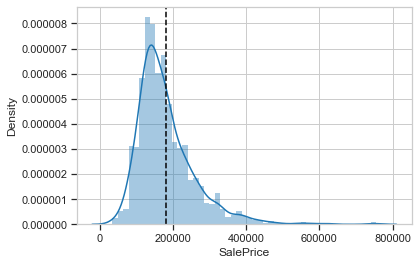

In [26]:
# Distribution of SalePrice and mean 
sns.set_context("notebook")
sns.distplot(ames['SalePrice'])
plt.axvline(ames['SalePrice'].mean(), color="k", linestyle="--")

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [28]:
#Skewness
print("Skewness of SalePrice: %f" % ames['SalePrice'].skew())

Skewness of SalePrice: 1.882876


Since the `SalePrice` variable is extremely large in value, another option for us would be to observe the logarithmic values of the variable, `log(SalePrice)` which shows a normal distribution.

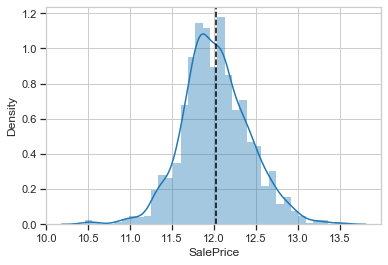

In [29]:
# Distribution of SalePrice and mean
sns.distplot(np.log(ames['SalePrice']))
plt.axvline(np.log(ames['SalePrice']).mean(), color="k", linestyle="--")

#### Other qualitative variables

In [30]:
ames.describe().T

count          mean          std     min     25%          50%  \
LotFrontage  1460.0     70.049958    22.024023    21.0    60.0    70.049958   
LotArea      1460.0  10516.828082  9981.264932  1300.0  7553.5  9478.500000   
OverallQual  1460.0      6.099315     1.382997     1.0     5.0     6.000000   
OverallCond  1460.0      5.575342     1.112799     1.0     5.0     5.000000   
MasVnrArea   1460.0    103.685262   180.569112     0.0     0.0     0.000000   
...             ...           ...          ...     ...     ...          ...   
CLASS90      1460.0      0.035616     0.185395     0.0     0.0     0.000000   
CLASS120     1460.0      0.059589     0.236805     0.0     0.0     0.000000   
CLASS160     1460.0      0.043151     0.203266     0.0     0.0     0.000000   
CLASS180     1460.0      0.006849     0.082505     0.0     0.0     0.000000   
CLASS190     1460.0      0.020548     0.141914     0.0     0.0     0.000000   

                  75%       max  
LotFrontage     79.00     313.0  
LotArea      11601.50  215245.0  
OverallQual      7.00      10.0  
OverallCond      6.00       9.0  
MasVnrArea     164.25    1600.0  
...               ...       ...  
CLASS90          0.00       1.0  
CLASS120         0.00       1.0  
CLASS160         0.00       1.0  
CLASS180         0.00       1.0  
CLASS190         0.00       1.0  

[69 rows x 8 columns]

**[Back to Title](#Exploratory-Data-Analysis)**

### Visualization

#### Univariate Analysis
#### Display the number of sales by states

Cities such as College Creek (CollgCr), Old Town (OldTown), North Ames (NAmes) and Edwards had the most number of sales. The range of housing sales price from these regions were lower and this might be the contributing factor to a higher number of sales from these locations.

[Text(0.5, 0, 'Number of counts')]

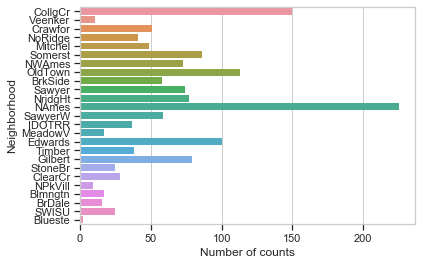

In [31]:
# Output Barplot showing the occurence of each categorical features         

sns.set_context("notebook")
g=sns.countplot(y="Neighborhood",data=ames_category)
g.set(xlabel="Number of counts")

#### Display the distribution of housing sale prices by states in boxplot

The housing sale prices at Northridge, Northridge Heights and Stone Brookhigher were in the higher range.

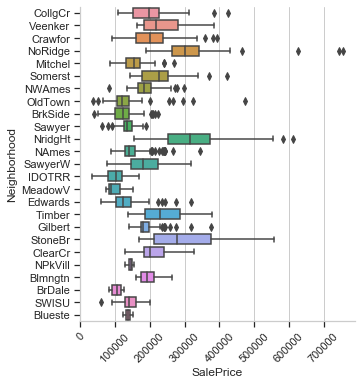

In [32]:
b=sns.catplot(y="Neighborhood",x="SalePrice",data=ames,kind="box")
plt.xticks(rotation=45)
plt.show()

#### Display count plot of the categorical attributes in bar plots

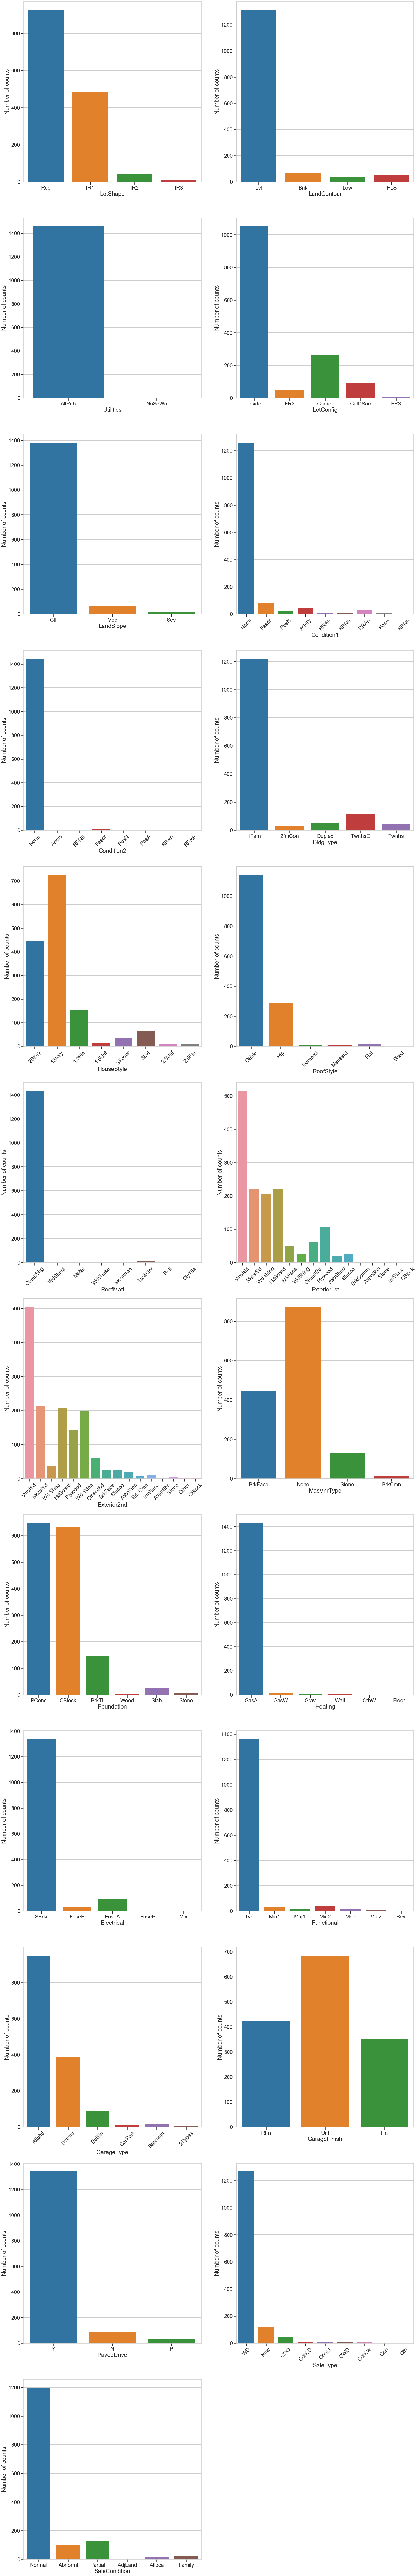

In [33]:
# Finding categorical features

category = []
for i in ames_category:
    if i in ["Neighborhood"]:
        pass
    else:
        category.append(i)
        
# Output Barplot showing the occurence of each categorical features         
sns.set_context("talk")
fig, ax = plt.subplots(ncols=2, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2.5)
sns.color_palette("husl", 8)
sns.set_context("poster")

#ncols=2,nrows=round(len(list(category))/2)

for i, feature in enumerate(list(ames_category[category]), 1):
    plt.subplot(len(list(category)), 2, i)
    if feature in ["MSSubClass","Condition1","Condition2","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","GarageType","SaleType"]:
        g=sns.countplot(x=feature,data=ames_category)
        g.set(ylabel="Number of counts")
        plt.xticks(rotation=45)
    else:
        g=sns.countplot(x=feature,data=ames_category)
        g.set(ylabel="Number of counts")

plt.show()

#### Display Sale price of distribution by categorical variables in boxplot

Based on the type of sale, houses that were just constructed and sold were sold at a higher price. Houses having contract of sales with low down payment, low interest or both had relatively lower sale price range. The characteristics that causes the price of houses to be higher are as described below:-
- Houses with irregular lots
- Houses that are at the hillside rather than near the bank
- Houses with fronage on the sides of property and at cul de sac
- Houses that were near the positive off-site feature such as park and greenbelt
- Double story houses
- Single-family Detached and Townhouse End Unit
- Houses with roofs made of Wood shake
- Exterior covered with cement board
- Houses with Stone masvnrtype
- Houses with builtin garage
- Houses with Standard Circuit Breakers & Romex
- Houses with paved or partially paved road



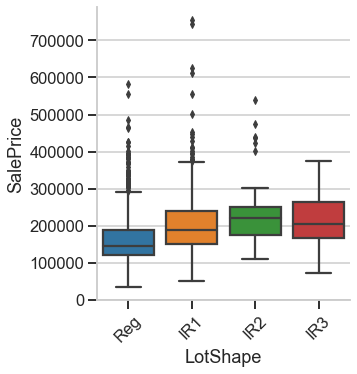

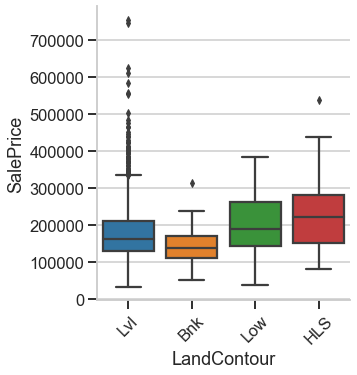

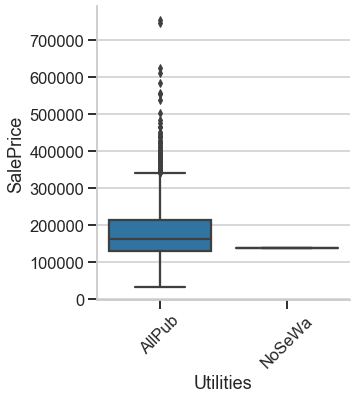

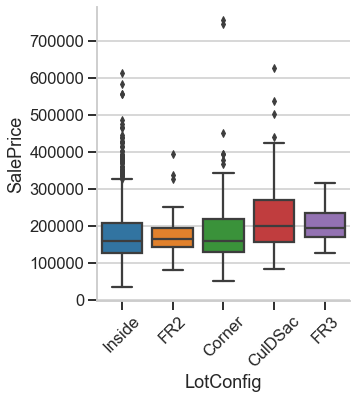

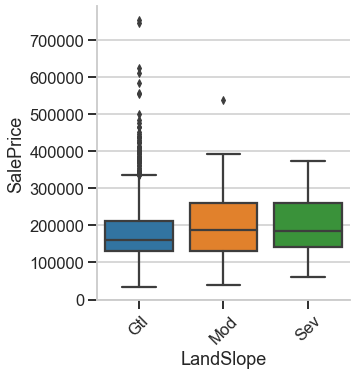

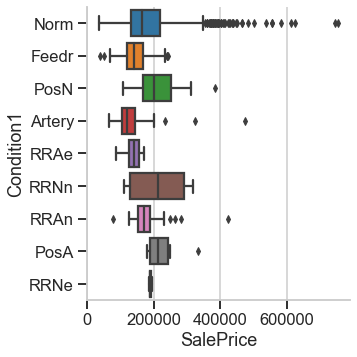

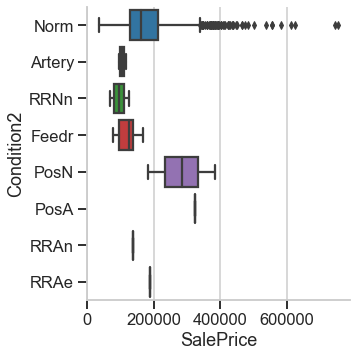

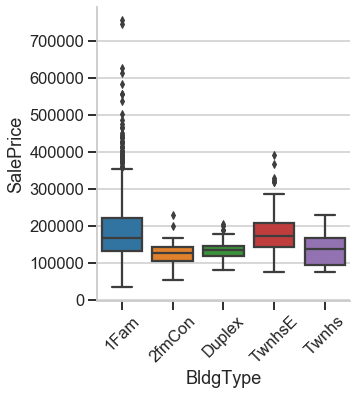

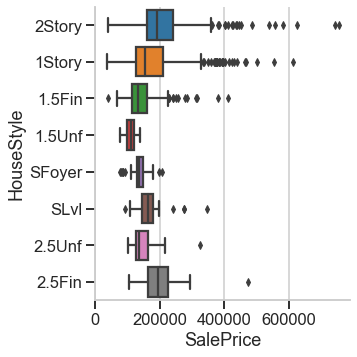

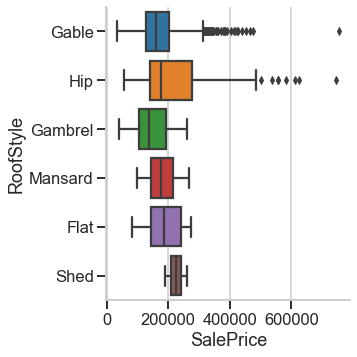

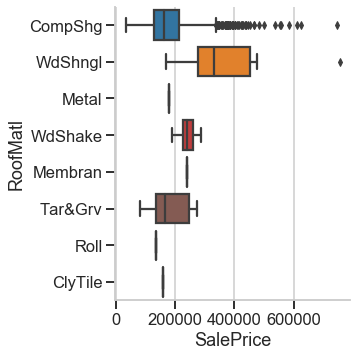

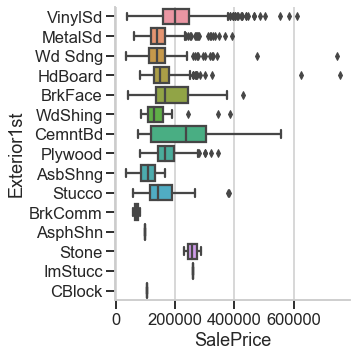

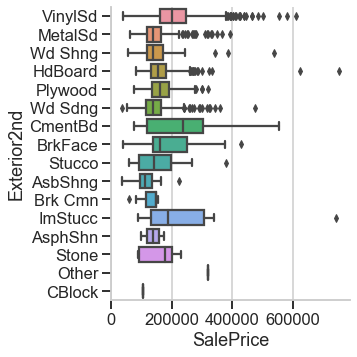

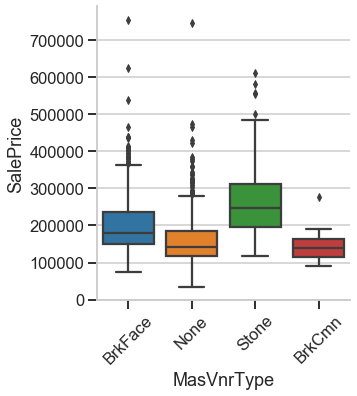

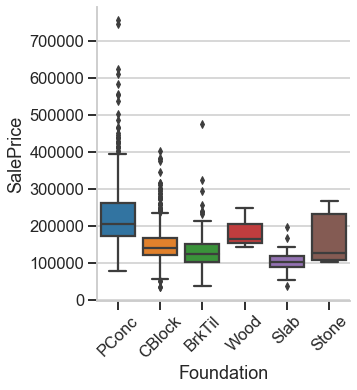

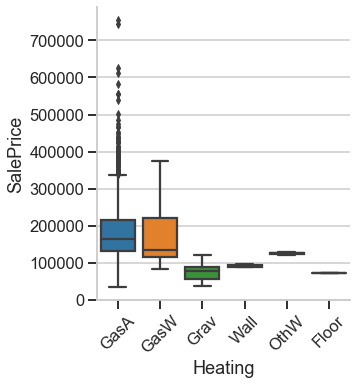

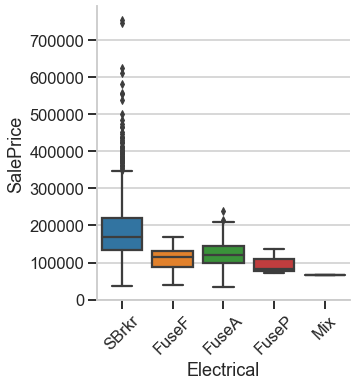

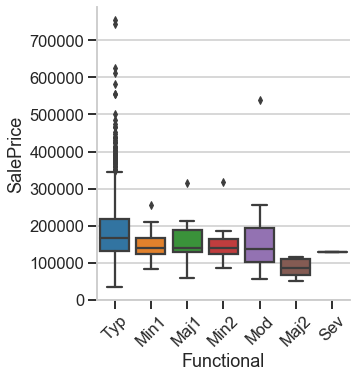

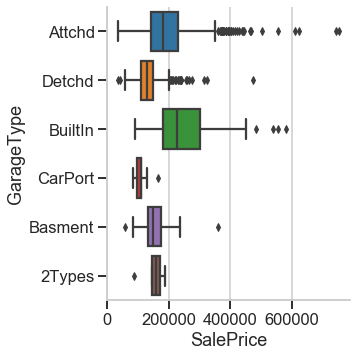

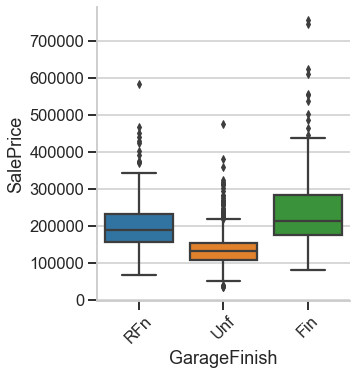

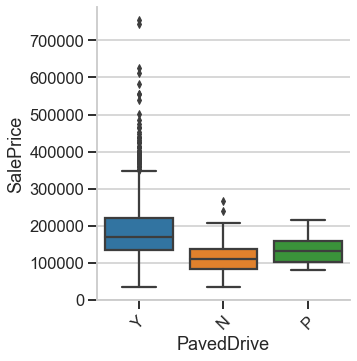

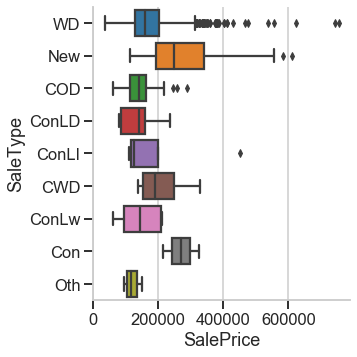

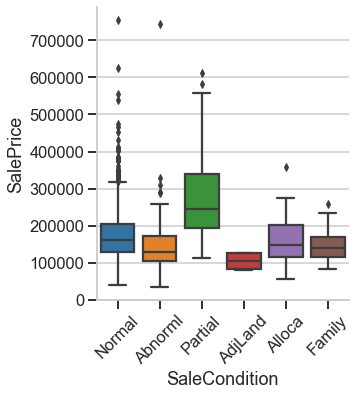

In [34]:
# Output Boxplot showing the distribution of sales price in for each attribute
sns.set_context("talk")
for i, feature in enumerate(list(ames[category]), 1):
    if feature in ["MSSubClass","Condition1","Condition2","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","GarageType","SaleType"]:
        b=sns.catplot(y=feature,x="SalePrice",data=ames,kind="box")
        plt.show()
    else:
        b=sns.catplot(x=feature,y="SalePrice",data=ames,kind="box")
        plt.xticks(rotation=45)
        plt.show()

#### Bivariate Analysis 
In this segment, we would be visualizing the numeric attributes with sale price in a form of scatter plots. 

There were a few interesting trends discovered from the visualization charts.  For example, houses with larger lot size and total squarefeet were sold at a higher price. Houses with longer distance from the street with the property measured were sold lower as compared to those with shorter distance to the street. 

Also, the were some houses without the Masonry veneer walls but houses with wider Masonry veneer walls fetched a higher price in the market. Besides that, houses with higher ratings for the finishing and condition were sold at a higher price without any doubt as they were guaranteed to be of high quality. 

In terms of the age of property, houses with shorter age (calculated since built) were sold at a higher place as well as for houses with garages built recently. Eventhough remodelled houses were expected to be sold at a higher price, however, according to the scatterplots, the selling price for houses which did not go through any remodelling versus those who were remodelled were rather quite similar to each other.

Moving on, houses with rating beyond typical or average were sold higher. Even houses with better equipments and facilities as listed below were sold at a higher price as per our expectation:

- Higher basement height
- Have central conditioning
- Large area of basement
- Good quality for heating 
- Good quality of kitchen
- Good quality of material on exterior
- More number of rooms
- More bathrooms
- More number of fireplaces
- Good quality of fireplaces
- With garage
- Garage that can occupy more cars and wider in space

Majority of the houses were did not have pools and even houses with pools were not recorded at an extremely higher price. Thus, `PoolArea` may not be a good attribute considered for our model as there we do not have sufficient information to describe its impact on the selling price. Another few attributes such as `BsmtFinSF2`, `BsmtFinType2`, `MiscVal`, `Remodeled Y/N` did not show any significant trends and patterns with sales price. Giving these attributes as benefit of the doubts here, we would do a further check in terms of correlation at the next segment of EDA to observe if they were significantly associated with `SalePrice`.

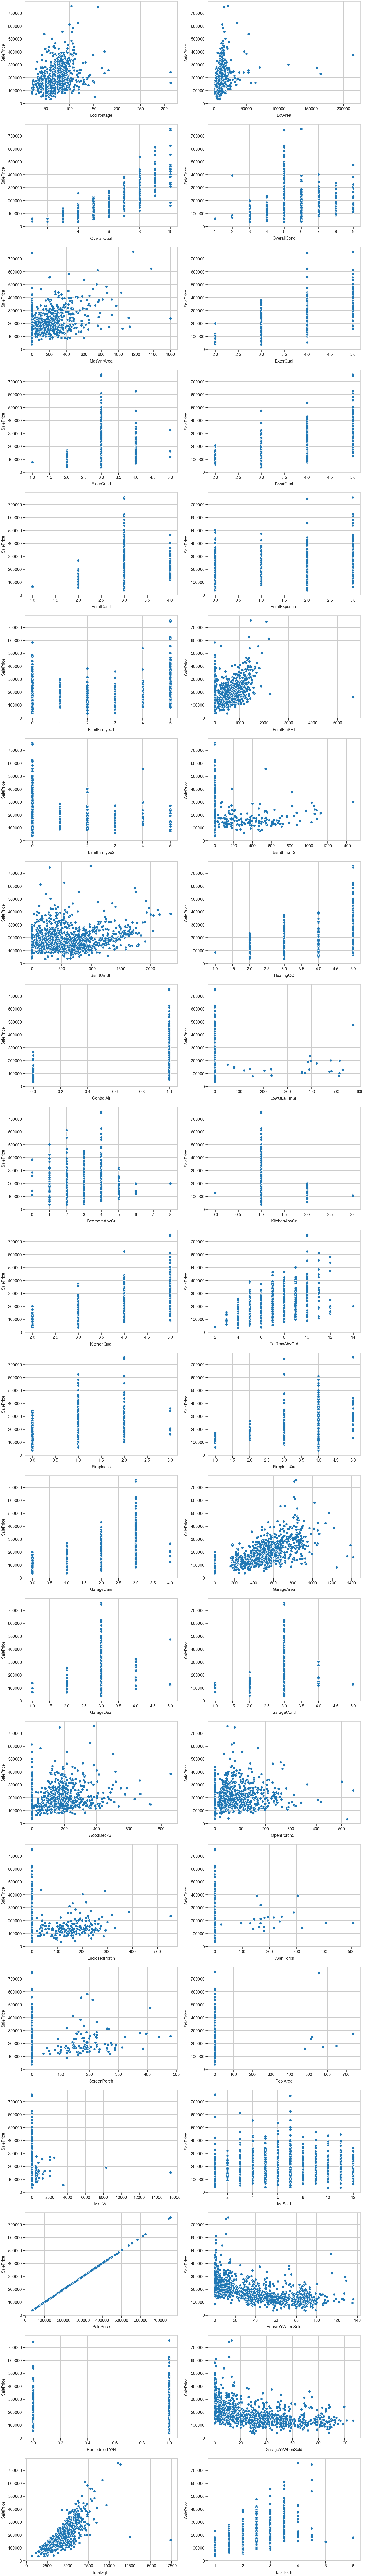

In [35]:
# Finding numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in ames_numerical.columns:
    if ames[i].dtype in numeric_dtypes:
        numeric.append(i)     
      
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=3)
sns.color_palette("husl", 8)
sns.set_context("poster")

for i, feature in enumerate(list(ames_numerical[numeric]), 1):
    plt.subplot(len(list(numeric)), 2, i)
    sns.scatterplot(x=feature, y='SalePrice', palette='Blues', data=ames_numerical)

    plt.xlabel('{}'.format(feature), size=20,labelpad=12.5)
    plt.ylabel('SalePrice', size=20, labelpad=12.5)

    for j in range(2):
        plt.tick_params(axis='x', labelsize=20)
        plt.tick_params(axis='y', labelsize=20)

    #plt.legend(loc='best', prop={'size': 10})
        
plt.show()

**[Back to Title](#Exploratory-Data-Analysis)**

### Correlation

From the visualizations above, we identified some patterns from the charts. We will now proceed to observe on the association strength of `SalePrice` with other attributes. As we performed bivariate analysis earlier, we found that `BsmtFinSF2`, `BsmtFinType2`, `MiscVal`, `Remodeled Y/N` columns did not have any specific trend with `SalePrice` column. 

Hence, our observations were indeed validated as shown in the correlation analysis performed below. These attributes showed a weak association with the selling price of houses. Besides that, there were a few attributes which had association near to 0 denoting a weak association with the selling price of houses. Therefore, these columns will be discarded.

In [36]:
corr_saleprice = pd.DataFrame(ames_numerical.corr().loc['SalePrice'].sort_values(ascending=False))
corr_saleprice.rename(columns={'SalePrice': 'Correlation'})

Correlation
SalePrice            1.000000
OverallQual          0.790982
totalSqFt            0.777123
ExterQual            0.682639
KitchenQual          0.659600
...                       ...
CLASS30             -0.238640
WD                  -0.242598
RM                  -0.288065
GarageYrWhenSold    -0.471032
HouseYrWhenSold     -0.523350

[69 rows x 1 columns]

In [37]:
to_remove_low_corr = ['PoolArea', 'MoSold', '3SsnPorch', 'ExterCond',
                      'FireplaceQu', 'BsmtFinSF2', 'MiscVal', 'Remodeled Y/N', 
                      'LowQualFinSF', 'BsmtFinType2', 'OverallCond']
ames.drop(to_remove_low_corr, axis = 1, inplace = True)
ames_numerical.drop(to_remove_low_corr, axis = 1, inplace = True)

C:\Users\aniq\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


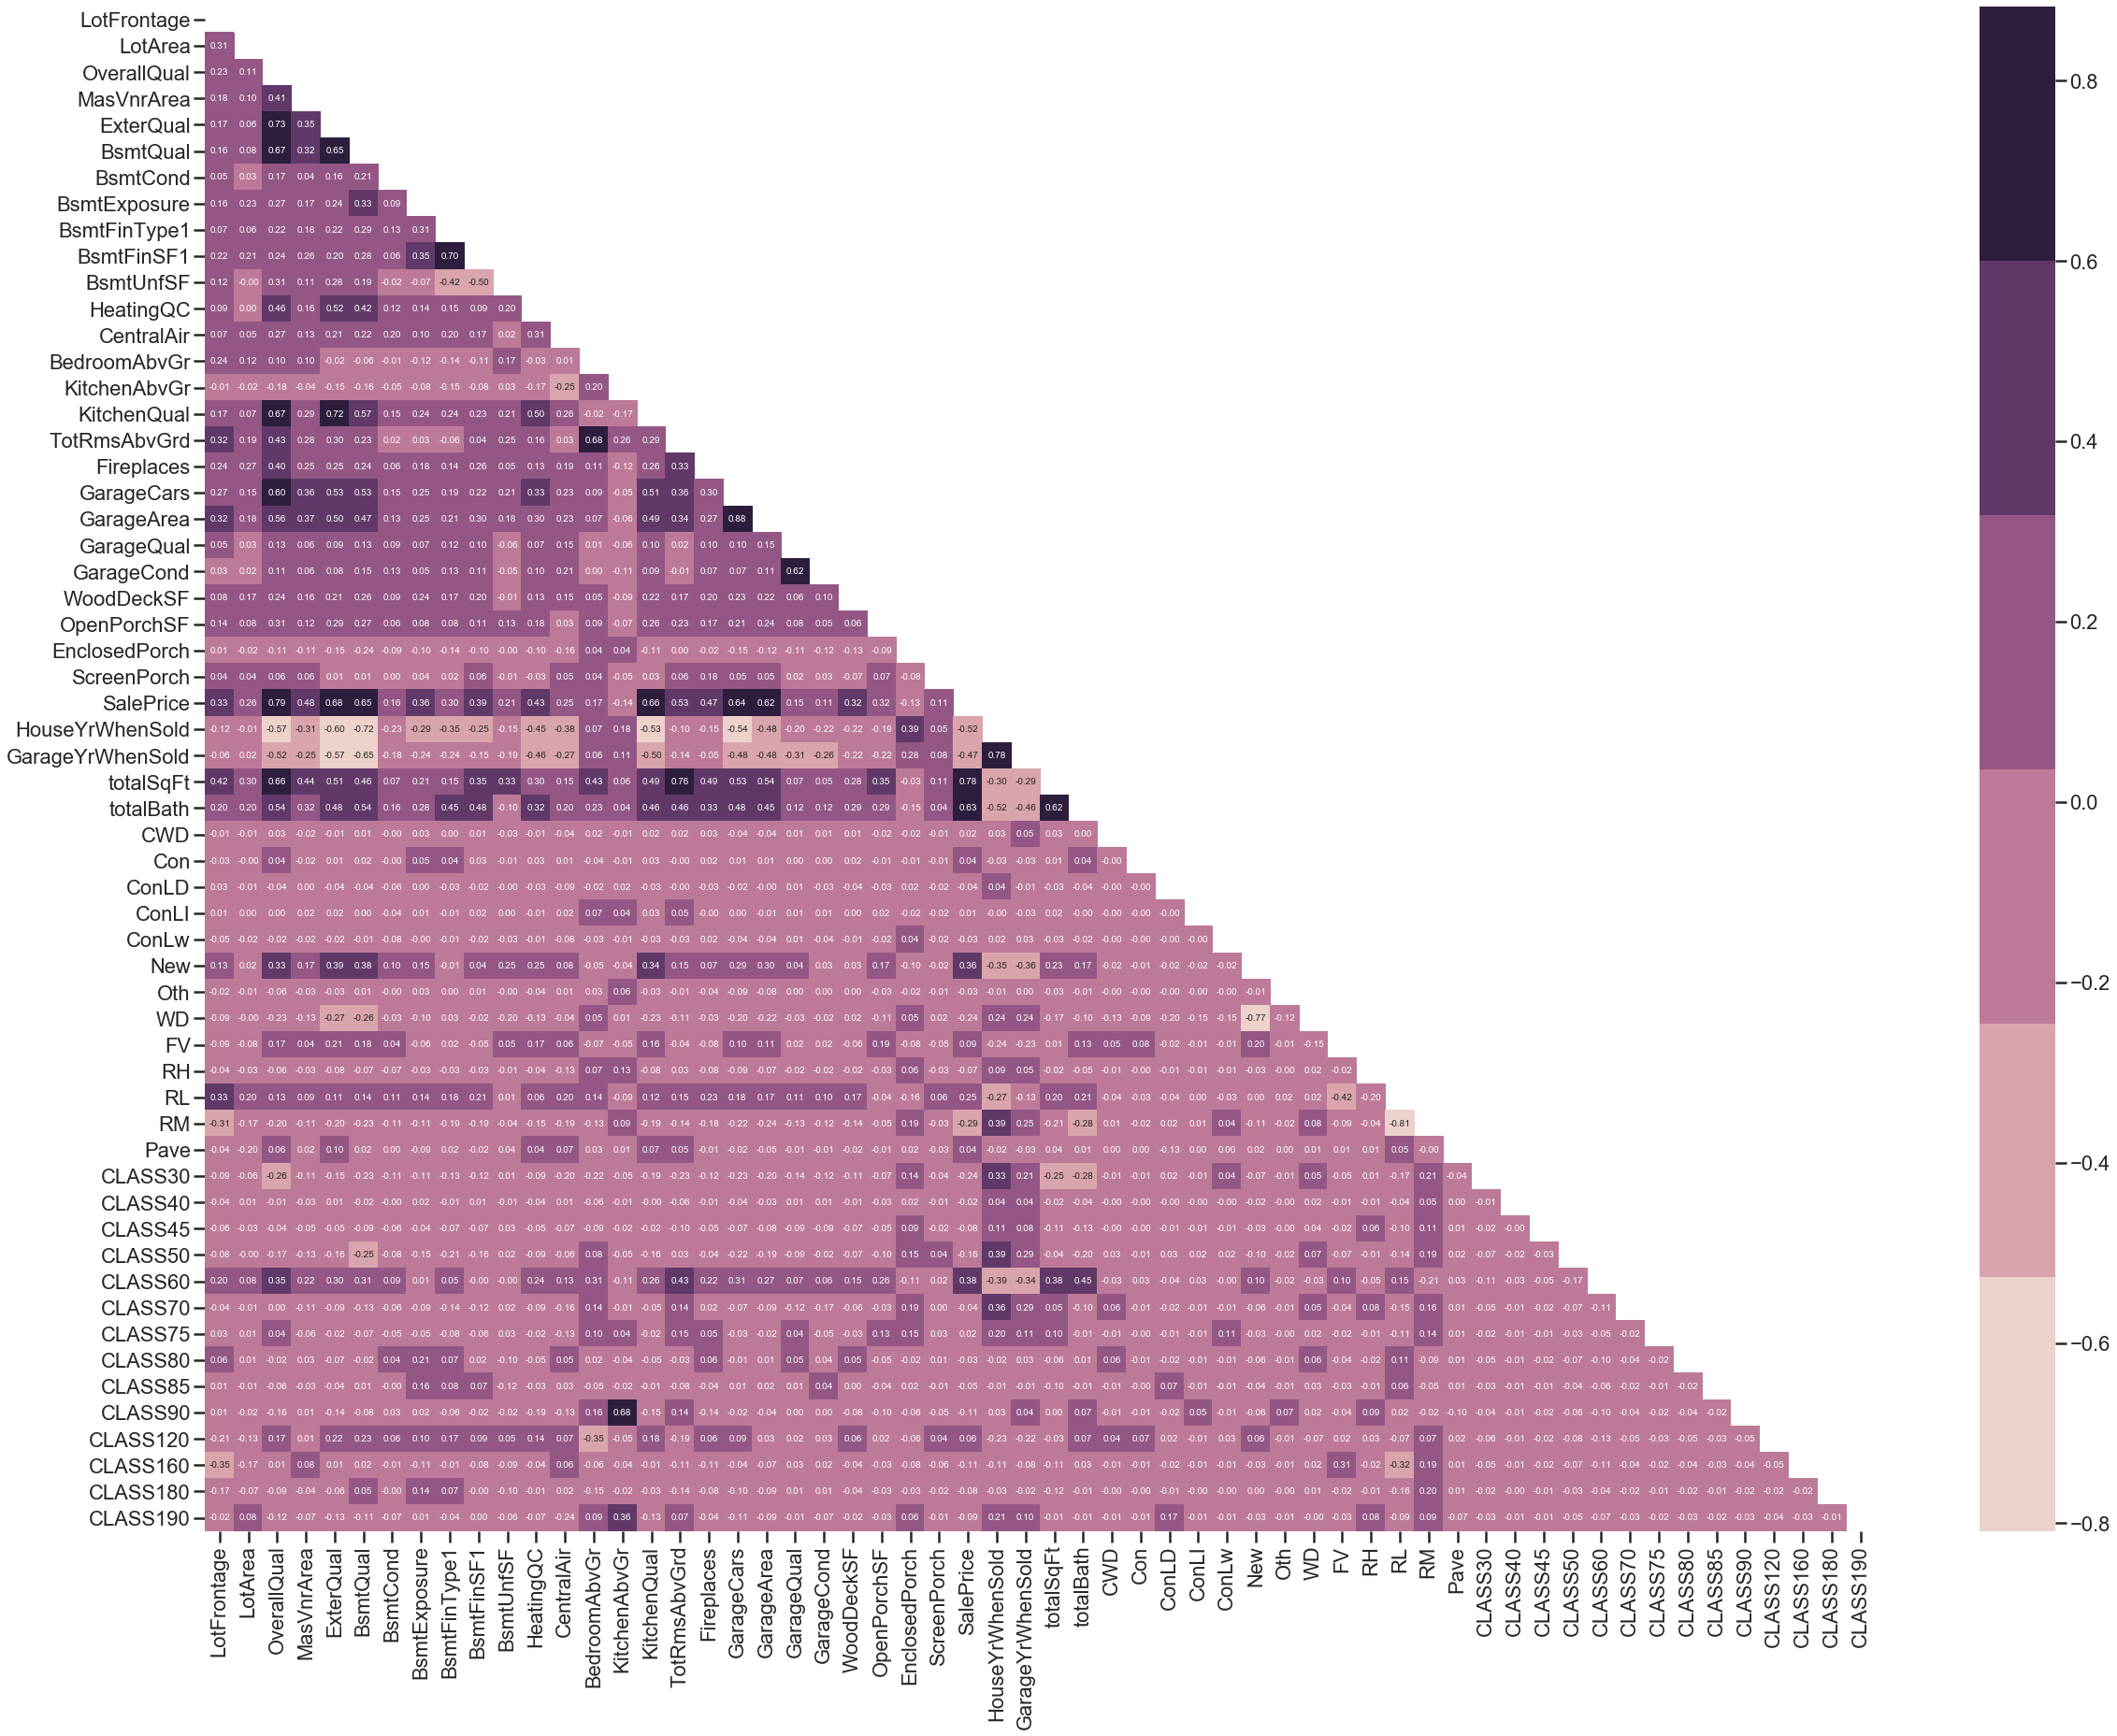

In [38]:
## Create a lower triangle heatmap
corr = ames_numerical.corr()
mask = np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)] = True

## Heatmap visualization
plt.figure(figsize=(40,30))
sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            annot_kws = {"size":10},
            cmap=sns.cubehelix_palette(),
            mask=mask)

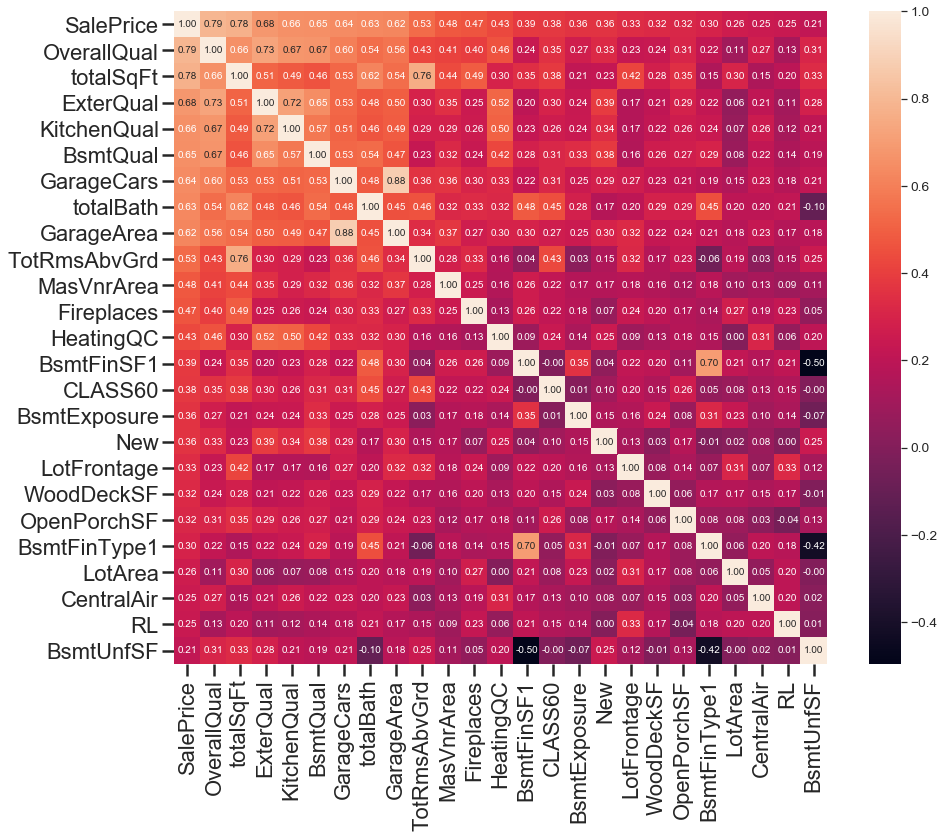

In [39]:
#saleprice correlation matrix
k = 25 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(ames[cols].values.T)
plt.subplots(figsize=(15,12))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Removed variables that were highly correlated with each other
We found that `GarageArea` and `GarageCars` were highly correlated with each other causing multicollinearity. Thus, we decided to keep one of the variables and `GarageCars` was chosen since its correlation with `SalePrice` column was higher.

In [40]:
correlated_features = set()
correlated_features_index=set()
correlation_matrix = ames_numerical.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]>0.8):
            colname = correlation_matrix.columns[i]
            rowname = correlation_matrix.index[j]
            correlated_features.add(colname)
            correlated_features_index.add(rowname)

In [41]:
correlated_features

{'GarageArea'}

In [42]:
correlated_features_index

{'GarageCars'}

In [43]:
# Removed one of the highly correlated attributes
ames.drop('GarageArea', axis = 1, inplace = True)
ames_numerical.drop('GarageArea', axis = 1, inplace = True)

**[Back to Title](#Exploratory-Data-Analysis)**

## Data Modelling

* [Splitting Data into Train and Test Set](#Splitting-Data-into-Train-and-Test-Set)
* [Model 1: Linear Regression](#Model-1:-Linear-Regression)
* [Model 2: Polynomial Regression](#Model-2:-Polynomial-Regression)
* [Model 3: Extreme Gradient Boosting (XGBoost)](#Model-3:-Extreme-Gradient-Boosting-(XGBoost))
* [Model 4: Random Forest](#Model-4:-Random-Forest)

**[Back to Content](#Contents)**

For data modelling, we trained and tested our data with 4 different regression models. After performing prediction on our target variable, `SalePrice`, we evaluated our models by using 2 metrics which were R-squared and Root Mean Square Error (RMSE). The R-square value which were both evaluated on the train set and test set explains on how well the data fits the regression model. As for the RMSE value, it is calculated based on the deviation between the predicted values and the actual values in the test set for the target variable, `SalePrice`.

### Splitting Data into Train and Test Set

In [44]:
# Display data with numeric variables
train_model = ames._get_numeric_data()
train_model.head()

LotFrontage  LotArea  OverallQual  MasVnrArea  ExterQual  BsmtQual  \
0         65.0     8450            7       196.0          4       4.0   
1         80.0     9600            6         0.0          3       4.0   
2         68.0    11250            7       162.0          4       4.0   
3         60.0     9550            7         0.0          3       3.0   
4         84.0    14260            8       350.0          4       4.0   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  ...  CLASS60  CLASS70  \
0       3.0           0.0           5.0         706  ...        1        0   
1       3.0           3.0           4.0         978  ...        0        0   
2       3.0           1.0           5.0         486  ...        1        0   
3       4.0           0.0           4.0         216  ...        0        1   
4       3.0           2.0           5.0         655  ...        1        0   

   CLASS75  CLASS80  CLASS85  CLASS90  CLASS120  CLASS160  CLASS180  CLASS190  
0        0        0        0        0         0         0         0         0  
1        0        0        0        0         0         0         0         0  
2        0        0        0        0         0         0         0         0  
3        0        0        0        0         0         0         0         0  
4        0        0        0        0         0         0         0         0  

[5 rows x 57 columns]

In [45]:
# Import library for splitting
from sklearn.model_selection import train_test_split

Y = train_model['SalePrice']
X = train_model.drop(['SalePrice'],axis =1)

# Split the data into train and test set in a ratio of 80:20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 100, test_size= 0.2)

In [46]:
# Check again to see if the splitting was an 80:20

print('Train:', X_train.shape, Y_train.shape)  #80%
print('Test:', X_test.shape, Y_test.shape)     #20%

Train: (1168, 56) (1168,)
Test: (292, 56) (292,)


**[Back to Title](#Data-Modelling)**

### Model 1: Linear Regression

Linear regression is the first model to be considered as it is the simplest method for prediction. The estimates are used to explain the relationship between the predictor variable or known as the dependent variable with one or more independent variables in which its curve or graph is in a form of straight line.

In [47]:
# Import library
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

# Define model for train
model_lin = linear_model.LinearRegression()
model_lin.fit(X_train, Y_train)

# Perform prediction
Y_pred_lin = model_lin.predict(X_test)

In [48]:
# Compute metrics score
r_sq_train_lin = model_lin.score(X_train, Y_train)
r_sq_test_lin = r2_score(Y_test, Y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(Y_test, Y_pred_lin))

# Display metrics score
print('R-squared (Train set):', round(r_sq_train_lin, 4))
print('R-squared (Test set):', round(r_sq_test_lin, 4))
print('RMSE:', round(rmse_lin, 4))

R-squared (Train set): 0.8292
R-squared (Test set): 0.8623
RMSE: 29757.0834


The value obtained for R-squared was **82.92%** on the train set and **86.23%** on the test set while RMSE value was **29757.0834**

We also performed further analysis by plotting the **Residual vs Fitted Graph** and **QQ plot** below. Based on the Residual versus Fitted Graph, the residual of dataset is heteroskedastic as the dispersion of the error is not constant and varies over a range of observations. From the QQ plot, some data points seemed to have more extreme values whereas the error terms for linear regression is supposed to follow a normal distribution. 

Therefore, we proceeded to utilize other regression algorithms though the model in test set performed better than the train set based on the R-squared value.

Text(0.5, 1.0, 'Residual vs Fitted Graph')

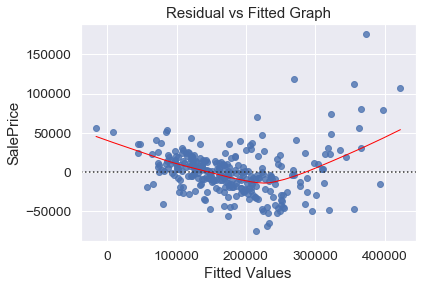

In [49]:
sns.residplot(Y_pred_lin.reshape(-1), Y_test, lowess = True, line_kws = {'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted Values")
plt.title('Residual vs Fitted Graph')

Text(0.5, 1.0, 'Q-Q Plot')

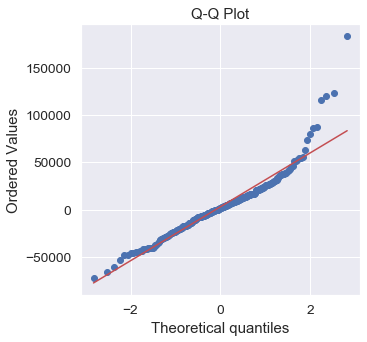

In [50]:
import scipy.stats as stats

plt.figure(figsize=(5,5))
stats.probplot(Y_test - Y_pred_lin, dist = "norm", plot = plt)
plt.title("Q-Q Plot")

**[Back to Title](#Data-Modelling)**

### Model 2: Polynomial Regression

Polynomial regression is also known as a regression model which falls under the same umbrella as the linear regression model. However, it is still different from linear regression as the relationship between dependent variable and independent variables are modeled as an nth degree polynomial. It is a way to increase the complexity of model and ensure that more data points could be fitted.

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

# Define model for train (polynomial degree = 2)
model = LinearRegression() 
features_poly = PolynomialFeatures(degree = 2)

X_train_poly = features_poly.fit_transform(X_train)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, Y_train)

# Perform prediction
X_test_poly = features_poly.fit_transform(X_test)
Y_pred_poly = model_poly.predict(X_test_poly)

In [52]:
# Compute metrics score
r_sq_train_poly = model_poly.score(X_train_poly, Y_train)
r_sq_test_poly = r2_score(Y_test, Y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(Y_test, Y_pred_poly))

# Display metrics score
print('R-squared (Train set):', round(r_sq_train_poly, 4))
print('R-squared (Test set):', round(r_sq_test_poly, 4))
print('RMSE:', round(rmse_poly, 4))

R-squared (Train set): 0.9865
R-squared (Test set): -734.8229
RMSE: 2175010.781


The value obtained for R-squared was **98.65%** on the train set and **-73482.29%** on the test set while RMSE value was **2175010.7810**

This goes to show that the regression model was unreliable due to overfitting in the training model while a negative score in the test set indicated that the model performed extremely poorly to the point where the variances increased. This has also lead to a significant increase in the RMSE value from the previous model. Hence, we moved on to the next algorithm.

**[Back to Title](#Data-Modelling)**

### Model 3: Extreme Gradient Boosting (XGBoost)

XGBoost is a scalable machine learning system which has been widely used for various data mining projects. It is a type of learning technique which produces prediction with the help of decision trees that usually ensemble a number of weak
prediction models. Its parallel and distributed computing makes algorithms to learn faster and allows for quicker model exploration.

In [53]:
from xgboost import XGBRegressor

# Define model for train
model_xgb = XGBRegressor(objective = 'reg:squarederror')
model_xgb.fit(X_train, Y_train)

# Perform prediction
Y_pred_xgb = model_xgb.predict(X_test)

In [54]:
# Compute metrics score
r_sq_train_xgb = model_xgb.score(X_train, Y_train)
r_sq_test_xgb = r2_score(Y_test, Y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(Y_test, Y_pred_xgb))

# Display metrics score
print('R-squared (Train set):', round(r_sq_train_xgb, 4))
print('R-squared (Test set):', round(r_sq_test_xgb, 4))
print('RMSE:', round(rmse_xgb, 4))

R-squared (Train set): 0.9996
R-squared (Test set): 0.8451
RMSE: 31559.3542


The value obtained for R-squared was **99.96%** on the train set and **84.51%** on the test set while RMSE value was **31559.3542**

This goes to show that overfitting occured in the training model as it could not be generalized well in the testing model as shown in the lower R-squared value from the training model. Also, the value for RMSE is higher than model 1. Hence, we still continued to explore the next algorithm.

**[Back to Title](#Data-Modelling)**

### Model 4: Random Forest

Random Forest is also another well-known and versatile machine learning algorithm for regression. This method relies on an ensemble or aggregation of decision trees. It is one algorithm which is not biased due to the fitting of multiple decision trees on various subsets of data to produce an average that improves the accuracy of prediction while controlling over-fitting. Also, with its stability, it is able to handle large number of attributes.

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Define model for train (20 trees)
model_rf = RandomForestRegressor(n_estimators = 20, random_state = 100)
model_rf.fit(X_train, Y_train)

# Perform prediction
Y_pred_rf = model_rf.predict(X_test)

In [56]:
# Compute metrics score
r_sq_train_rf = model_rf.score(X_train, Y_train)
r_sq_test_rf = r2_score(Y_test, Y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))

# Display metrics score
print('R-squared (Train set):', round(r_sq_train_rf, 4))
print('R-squared (Test set):', round(r_sq_test_rf, 4))
print('RMSE:', round(rmse_rf, 4))

R-squared (Train set): 0.9679
R-squared (Test set): 0.8947
RMSE: 26020.8202


The value obtained for R-squared was **96.79%** on the train set and **89.47%** on the test set while RMSE value was **26020.8202**

There was an overall improvement in the R-squared value for the test set a d RMSE value as compared to the previous models. Hence, we decided to not continue on with the next algorithm and proceed directly to evaluate our models.

**[Back to Title](#Data-Modelling)**

## Model Evaluation

As explained in the data modelling section, 4 algorithms were evaluated based on R-squared value and RMSE value in order to determine which model were the best in predicting the price of houses. The results for each algorithm performance are tabulated as below:-


| Algorithm | R-squared Train (%) | | R-squared Test (%) | | RMSE |
| :-: | :-: | | :-: | | :-: |
|  Linear Regression | 82.92 | | 86.23 | | 29757.08 |
| Polynomial Regression | 98.65 | | -73482.29 | | 2175010.78 |
| XGBoost | 99.96 | | 82.92 | | 84.51 |
| Random Forest | 96.79 | | 89.47 | | 26020.82 |

Hence, the chosen model would be **Random Forest** as it has the **lowest RMSE value** of 26020.82 and **highest R-squared value** of 89.47% which indicates the percentage of the test set fitting the regression model.

After selecting the best model which was **Random Forest**, we plotted the feature importance bar chart to understand on which parameters were the most important in predicting the target variable, `SalePrice`. Hence, the top 10 important features were `OverallQual`, `totalSqFt`, `BsmtFinSF1`, `HouseYrWhenSold`, `MasVnrArea`, `LotArea`, `BsmtQual`, `GarageCars`, `BsmtUNfSF`, `KitchenQual`


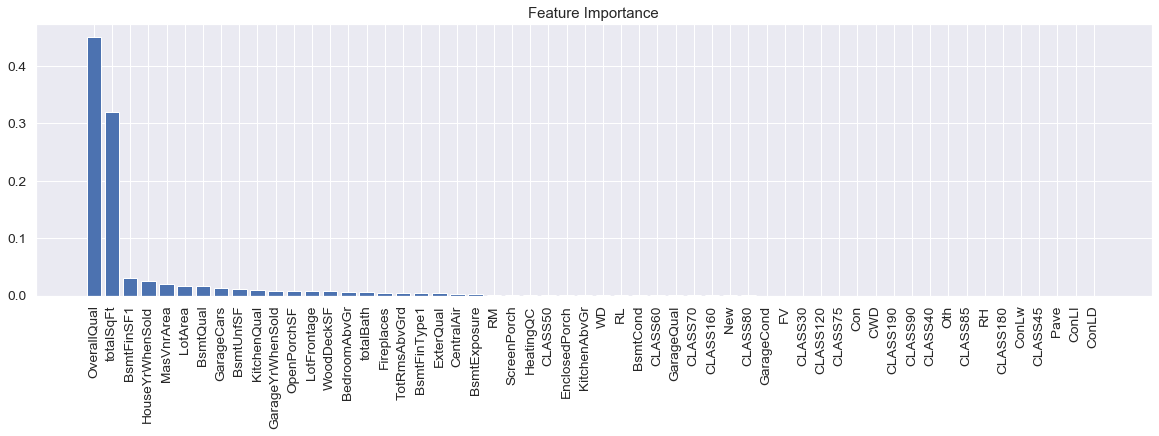

In [57]:
# Sorting in descending order and rearranging feature names to match sorted feature importance
importance = model_rf.feature_importances_
indices = np.argsort(importance)[::-1] 
names = [X_train.columns[i] for i in indices]

# Bar chart creation
plt.figure(figsize=(20, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), names, rotation = 90)

plt.show()

**[Back to Content](#Contents)**

## Conclusion

There were many key takeaways that could be derived from this project after exploring the Ames house prices dataset. With the exploration on data, it has lead us to form initial questions while we addressed every one of them via data analysis. In solving the most crucial problem for stakeholders (i.e. buyers, sellers, builders, investors) on how can house prices be predicted based on certain identified features, we built four different regression models and chose the best one to solve the issue. 

The algorithms that we have utilized were Linear Regression, Polynomial Regression, XGBoost, and Random Forest. Eventhough all models achieved desirable results except the Polynomial Regression model, there would always be pros and cons for every algorithm. For instance, Random Forest has always been known for its stability and unbiasness. However, they may be prone to issue in time complexity whereby the data requires longer time to be trained especially if the number of estimators (trees) increases; whereas for XGBoost, algorithm learns faster which requires less computational resource. As for the linear regression model, its curve is only limited to linear and its errors are assumed to be normally distributed. Therefore, if there were to be non linear or extreme values on data points, this model may be proned to high biasness as it is unable to capture every pattern in the data resulting in under-fitting. 

As a rule of thumb, models are usually evaluated based on RMSE value in determining its ability to predict with lesser deviation from the actual value and R-squared value in determining on how well has the model performed on the test data set. Hence, the algorithm which had the lowest RMSE score and highest R-squared value was Random Forest which lead us to regard this model as the chosen one for our house price prediction model.

Moving on, from the chosen model, we identified the most influential parameters to predict the house selling price which were overall quality of certain features, total square feet of certain features, finished basement sqaure feet, year when house was sold, and Masonry Veneer area is square feet as the top five features. Furthermore, from the data, we have managed to identify several patterns on what are the features or atrributes that affects house prices as well as to learn on its pricing trend over the years. Thus, some of the identifed features that causes a house to be more expensive in the market would be the recently remodelled ones, its strategic locations due to convenience and environment (i.e. hillside, parks, near the streets), its lot size or basement being on the larger end, its type being on the luxury end (i.e. double story, single-family detached, townhouse), and equipped with better facilities (i.e. good quality of living spaces, more number of rooms, contains a garage for more parking spaces).

In accordance to the yearly trend of house prices from the late 19th century till 20th century, there was a gradual increase over the years since houses, or in general, real estates are usually an appreciating asset. Eventhough, the prices were quite consistent from 2006 till 2010, there were some houses which were sold at a very high price based on some of the outliers that were detected which connects us back to the previous statement of the houses being an asset that would not depreciate for many more years to come.

In a nutshell, this analysis has fulfilled our objective in guiding potential house builders to identify the most influential aspects of what constitutes a higher price house or what contributes to a better prediction house pricing model. With better models, house prices can be optimized well to generate the most profit for the house sellers while ensuring that the expenditure is as reasonable as possible for the house buyers. This would then lead to a better investment opportunity for the house investors. 

**[Back to Content](#Contents)**

## Future Work

There is always room for improvement to improve on the accuracy and efficiency of the model as well as the techniques for data mining. Hence, for future work, researchers should consider acquiring datasets which consist of more cities to increase the number of data points for more accurate predictions; provided that the computational power increases in the system. Therefore, methods on the ability to fit complex models at a higher speed should also be thought of and executed. Also, obtaining historical data such as feedback or reviews from house buyers is also crucial in which a suitable rating can be determined and assigned to each houses based on sentiment analysis.

Furthermore, a hybrid algorithm consisting of 2 or more algorithms can be considered to leverage on the strengths of every algorithm to obtain a more accurate prediction on the house prices. For instance, a combination between two different Machine Learning models such as XGBoost with Linear Regression or any Machine Learning model with a Deep Learning Model such as Neural Network would be ideal. Suitable weightages are assigned on the multiple algorithms based on its importance for the project. Lastly, we also encourage ourselves and other researchers to perform feature selection on future projects before proceeding to model our data. Some of the suggested methods for feature selection would be stepwise regression, recursive feature elimination, or principal component analysis (PCA).

**[Back to Content](#Contents)**

## References

Truong, Q., Nguyen, M., Dang, H., and Mei, B. (2020). Housing Price Prediction via Improved Machine Learning. 2019 International Conference on Identification, Information and Knowledge in the Internet of Things (IIKI2019), 174, 433-442. doi:10.1016/j.procs.2020.06.111

Varma, A., Sarma, A., Doshi, S., and Nair, R. (2018). House Price Prediction Using Machine Learning. 2018 Second International Conference on Inventive Communication and Computational Technologies (ICICCT), 1936-1939. doi:doi:10.1109/icicct.2018.8473231

Vineeth, N., Ayyappa, M., and Bharathi, B. (2018). House Price Prediction Using Machine Learning. Soft Computing Systems. Communications in Computer and Information Science. , 425-433. doi:10.1007/978-981-13-1936-5 

Yusof, A. M., and Ismail, S. (2012). Multiple Regressions in Analysing House Price Variations. Communications of the IBIMA, 2012, 1-9. doi:10.5171/2012.383101

**[Back to Content](#Contents)**

## Appendix A: Metadata 
* MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

* MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
* LotFrontage: Linear feet of street connected to property

* LotArea: Lot size in square feet

* Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
* Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
* LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
* LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
* Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
* LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
* LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
* Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
* Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
* Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
* BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
* HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
* OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
* OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
* YearBuilt: Original construction date

* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

* RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
* RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
* Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
* Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
* MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
* MasVnrArea: Masonry veneer area in square feet

* ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
* ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
* Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
* BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
* BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
* BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
* BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
* BsmtFinSF1: Type 1 finished square feet

* BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

* BsmtFinSF2: Type 2 finished square feet

* BsmtUnfSF: Unfinished square feet of basement area

* TotalBsmtSF: Total square feet of basement area

* Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	    Gas forced warm air furnace
       GasW	    Gas hot water or steam heat
       Grav	    Gravity furnace	
       OthW	    Hot water or steam heat other than gas
       Wall	    Wall furnace
		
* HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
* CentralAir: Central air conditioning

       N	No
       Y	Yes
		
* Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
* 1stFlrSF: First Floor square feet
 
* 2ndFlrSF: Second floor square feet

* LowQualFinSF: Low quality finished square feet (all floors)

* GrLivArea: Above grade (ground) living area square feet

* BsmtFullBath: Basement full bathrooms

* BsmtHalfBath: Basement half bathrooms

* FullBath: Full bathrooms above grade

* HalfBath: Half baths above grade

* Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

* Kitchen: Kitchens above grade

* KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

* Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
* Fireplaces: Number of fireplaces

* FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
* GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
* GarageYrBlt: Year garage was built
		
* GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
* GarageCars: Size of garage in car capacity

* GarageArea: Size of garage in square feet

* GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
* GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
* PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
* WoodDeckSF: Wood deck area in square feet

* OpenPorchSF: Open porch area in square feet

* EnclosedPorch: Enclosed porch area in square feet

* 3SsnPorch: Three season porch area in square feet

* ScreenPorch: Screen porch area in square feet

* PoolArea: Pool area in square feet

* PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
* Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
* MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
* MiscVal: $ Value of miscellaneous feature

* MoSold: Month Sold (MM)

* YrSold: Year Sold (YYYY)

* SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
* SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

* **[Back to Data Acquisition and Exploration](#Data-Acquisition-and-Exploration)**
* **[Back to Content](#Contents)**